<a href="https://colab.research.google.com/github/justinye0617/Coupon-Acceptance-Rates/blob/main/prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [53]:
print('Dataset Info:')
print(data.info())

print('\nMissing Values:')
print(data.isnull().sum())

print('\nDuplicate Values:')
print(data.duplicated().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   12684 non-null  object
 15  Bar                   

3. Decide what to do about your missing data -- drop, replace, other...

In [75]:
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percent})

columns_to_drop = missing_df[missing_df["Percentage"] > 50].index
data.drop(columns = columns_to_drop, inplace = True)

categorical_cols = data.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

numerical_cols = data.select_dtypes(include=["number"]).columns
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].median())

data.drop_duplicates(inplace = True)

4. What proportion of the total observations chose to accept the coupon?



In [76]:
accepted_count = data['Y'].sum()
total_count = len(data)
acceptance_rate = accepted_count / total_count
print(f"Acceptance Rate: {acceptance_rate:.2%}")

Acceptance Rate: 56.76%


5. Use a bar plot to visualize the `coupon` column.

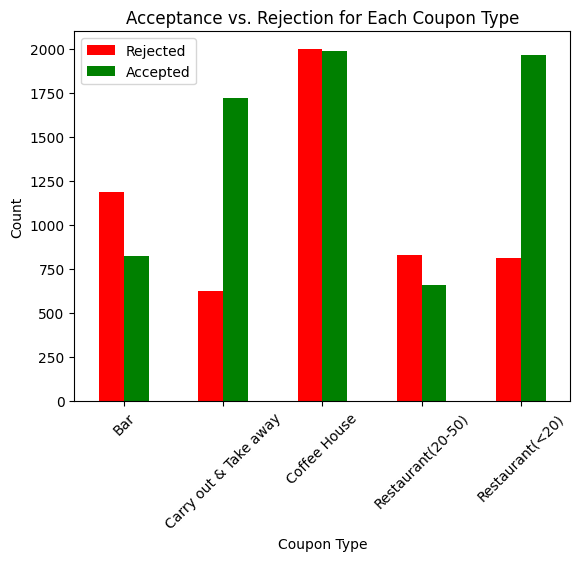

In [77]:
coupon_acceptance = data.groupby(["coupon", "Y"]).size().unstack()
coupon_acceptance.plot(kind = "bar", color = ["red", "green"])

plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.title("Acceptance vs. Rejection for Each Coupon Type")
plt.legend(["Rejected", "Accepted"])
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

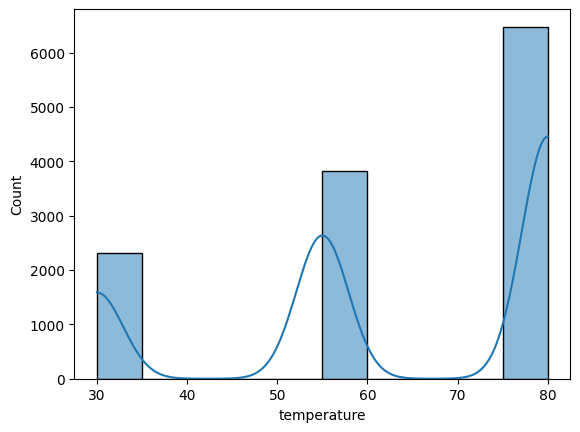

In [78]:
sns.histplot(data["temperature"], bins = 10, kde = True)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [79]:
bar_coupons = data[data["coupon"] == "Bar"]
print(bar_coupons.head())

        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9   Female  21  Unmarried partner  ...        never       1~3   
13  Female  21  Unmarried partner  ...        never       1~3   
17  Female  21  Unmarried partner  ...        never       1~3   
24    Male  21             Single  ...        less1       4~8   
35    Male  21             Single  ...        less1       4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
9                   4~8              1~3               

2. What proportion of bar coupons were accepted?


In [80]:
accepted_bar_coupons = bar_coupons["Y"].sum()
total_bar_coupons = len(bar_coupons)
acceptance_rate = accepted_bar_coupons / total_bar_coupons
print(f"Acceptance Rate: {acceptance_rate:.2%}")

Acceptance Rate: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [81]:
bar_coupons = data[data["coupon"] == "Bar"]

low_bar_visits = bar_coupons[bar_coupons["Bar"].isin(["never", "less than 1", "1~3"])]
high_bar_visits = bar_coupons[bar_coupons["Bar"].isin(["4~8", "greater than 8"])]

low_acceptance_rate = low_bar_visits["Y"].mean()
high_acceptance_rate = high_bar_visits["Y"].mean()

print(f"Acceptance Rate (≤ 3 visits/month): {low_acceptance_rate:.2%}")
print(f"Acceptance Rate (> 3 visits/month): {high_acceptance_rate:.2%}")


Acceptance Rate (≤ 3 visits/month): 33.73%
Acceptance Rate (> 3 visits/month): 78.00%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [82]:
bar_coupons = data[data["coupon"] == "Bar"].copy()

bar_coupons.loc[:, "age_numeric"] = bar_coupons["age"].astype(str).str.extract(r'(\d+)').astype(float)

group_1 = bar_coupons[
    (bar_coupons["Bar"].isin(["1~3", "4~8", "greater than 8"])) &
    (bar_coupons["age_numeric"] > 25)
]
group_2 = bar_coupons[~bar_coupons.index.isin(group_1.index)]

acceptance_rate_group_1 = group_1["Y"].mean()
acceptance_rate_group_2 = group_2["Y"].mean()

print(f"Acceptance Rate (Bar > 1x/month & Age > 25): {acceptance_rate_group_1:.2%}")
print(f"Acceptance Rate (All Others): {acceptance_rate_group_2:.2%}")

Acceptance Rate (Bar > 1x/month & Age > 25): 69.49%
Acceptance Rate (All Others): 34.14%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [83]:
bar_coupons = data[data["coupon"] == "Bar"].copy()

bar_visits_condition = bar_coupons["Bar"].isin(["1~3", "4~8", "greater than 8"])
passenger_condition = bar_coupons["passanger"] != "Kid(s)"
occupation_condition = bar_coupons["occupation"] != "Farming, Fishing, and Forestry"

group_1 = bar_coupons[bar_visits_condition & passenger_condition & occupation_condition]

group_2 = bar_coupons[~bar_coupons.index.isin(group_1.index)]

acceptance_rate_group_1 = group_1["Y"].mean()
acceptance_rate_group_2 = group_2["Y"].mean()

print(f"Acceptance Rate (Bar > 1x/month, No Kid Passenger, No Farming/Fishing/Forestry Job): {acceptance_rate_group_1:.2%}")
print(f"Acceptance Rate (All Others): {acceptance_rate_group_2:.2%}")

Acceptance Rate (Bar > 1x/month, No Kid Passenger, No Farming/Fishing/Forestry Job): 71.17%
Acceptance Rate (All Others): 30.92%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [94]:
bar_coupons = data[data["coupon"] == "Bar"].copy()

bar_coupons["age_numeric"] = bar_coupons["age"].astype(str).str.extract(r'(\d+)').astype(float)

cond_1_bar = (
    bar_coupons["Bar"].isin(["1~3", "4~8", "greater than 8"]) &
    (bar_coupons["passanger"] != "Kid(s)") &
    (bar_coupons["maritalStatus"] != "Widowed")
)

cond_2_bar = (
    bar_coupons["Bar"].isin(["1~3", "4~8", "greater than 8"]) &
    (bar_coupons["age_numeric"] < 30)
)

cond_3_bar = (
    bar_coupons["RestaurantLessThan20"].isin(["4~8", "greater than 8"]) &
    bar_coupons["income"].isin(["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"])
)

group_1 = bar_coupons[cond_1_bar | cond_2_bar | cond_3_bar]

group_2 = bar_coupons[~bar_coupons.index.isin(group_1.index)]

acceptance_rate_group_1 = group_1["Y"].mean()
acceptance_rate_group_2 = group_2["Y"].mean()
print(f"Acceptance Rate (Matches Any Condition): {acceptance_rate_group_1:.2%}")
print(f"Acceptance Rate (All Others): {acceptance_rate_group_2:.2%}")

Acceptance Rate (Matches Any Condition): 59.64%
Acceptance Rate (All Others): 31.59%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [16]:
#1. Frequent bar goers are more likely to accept bar coupons.
#2. Younger drivers are more likely to accept bar coupons
#3. Drivers without kids as passengers accept more
#4. Single/non-widowed drivers might engage in more social activities at the bar
#5. Those who frequently eat at cheap restaurants and under $50k are more likely to accept bar coupons

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [90]:
restaurant_coupons = data[data["coupon"] == "Restaurant(<20)"].copy()

restaurant_coupons["age_numeric"] = restaurant_coupons["age"].astype(str).str.extract(r'(\d+)').astype(float)

# Condition 1: Eats at cheap restaurants more than 3 times a month and earns less than 75K
cond_1_r20 = (
    restaurant_coupons["RestaurantLessThan20"].isin(["4~8", "greater than 8"]) &
    restaurant_coupons["income"].isin(["Less than $12500", "$12500 - $24999", "$25000 - $37499",
                                       "$37500 - $49999", "$50000 - $62499", "$62500 - $74999"])
)

# Condition 2: Under 30 years old and frequently buys takeaway food
cond_2_r20 = (
    (restaurant_coupons["age_numeric"].notnull()) &
    (restaurant_coupons["age_numeric"] < 30) &
    restaurant_coupons["CarryAway"].isin(["4~8", "greater than 8"])
)

# Condition 3: Has a partner or friends as a passenger and goes to coffee houses at least once a month
cond_3_r20 = (
    restaurant_coupons["passanger"].str.strip().str.lower().isin(["partner", "friend(s)"]) &
    restaurant_coupons["CoffeeHouse"].isin(["1~3", "4~8", "greater than 8"])
)

# Condition 4: Frequent Fastfood Eaters and Low-Mid Income
cond_4_r20 = (
    restaurant_coupons["RestaurantLessThan20"].isin(["4~8", "greater than 8"]) &
    restaurant_coupons["income"].isin(["Less than $12500", "$12500 - $24999", "$25000 - $37499"])
)

# Condition: Drivers on a Strict Schedule
cond_5_r20 = restaurant_coupons["destination"].isin(["Home", "Work"])

# Condition: Bad Weather & Short Expiration Coupons
cond_6_r20 = (restaurant_coupons["weather"].isin(["Rainy", "Snowy"])) & (restaurant_coupons["expiration"] == "2h")


acceptance_rate_cond_1_r20 = restaurant_coupons[cond_1_r20]["Y"].mean()
acceptance_rate_cond_2_r20 = restaurant_coupons[cond_2_r20]["Y"].mean()
acceptance_rate_cond_3_r20 = restaurant_coupons[cond_3_r20]["Y"].mean()
acceptance_rate_cond_4_r20 = restaurant_coupons[cond_4_r20]["Y"].mean()
acceptance_rate_cond_5_r20 = restaurant_coupons[cond_5_r20]["Y"].mean()
acceptance_rate_cond_6_r20 = restaurant_coupons[cond_6_r20]["Y"].mean()

print(f"Acceptance Rate (Condition 1 - Eats Cheap & <$75K): {acceptance_rate_cond_1_r20:.2%}")
print(f"Acceptance Rate (Condition 2 - Under 30 & Takeaway): {acceptance_rate_cond_2_r20:.2%}")
print(f"Acceptance Rate (Condition 3 - Partner/Friends & Coffee): {acceptance_rate_cond_3_r20:.2%}")
print(f"Acceptance Rate (Condition 4 - Low-Mid Income): {acceptance_rate_cond_4_r20:.2%}")
print(f"Acceptance Rate (Condition 5 - Strict Schedule): {acceptance_rate_cond_5_r20:.2%}")
print(f"Acceptance Rate (Condition 6 - Bad Weather & Short Exp): {acceptance_rate_cond_6_r20:.2%}")

Acceptance Rate (Condition 1 - Eats Cheap & <$75K): 72.49%
Acceptance Rate (Condition 2 - Under 30 & Takeaway): 73.30%
Acceptance Rate (Condition 3 - Partner/Friends & Coffee): 84.88%
Acceptance Rate (Condition 4 - Low-Mid Income): 69.78%
Acceptance Rate (Condition 5 - Strict Schedule): 57.09%
Acceptance Rate (Condition 6 - Bad Weather & Short Exp): 32.30%


<ipython-input-95-2a723d17135a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Category", y = "Acceptance Rate", data = plot_data, palette = "Blues")


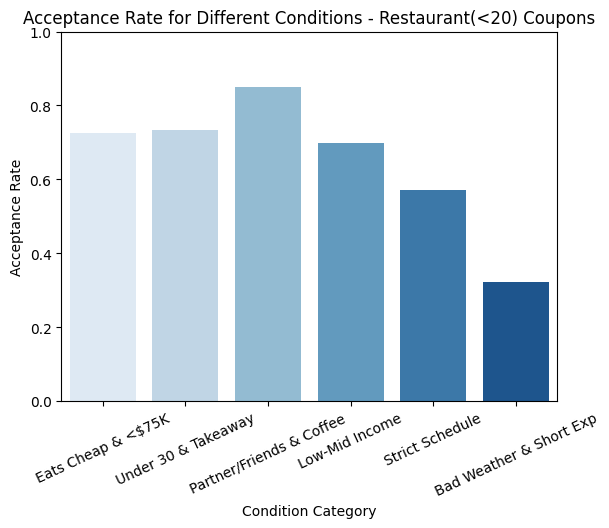

In [95]:
plot_data = pd.DataFrame({
    "Category": [
        "Eats Cheap & <$75K",
        "Under 30 & Takeaway",
        "Partner/Friends & Coffee",
        "Low-Mid Income",
        "Strict Schedule",
        "Bad Weather & Short Exp"
    ],
    "Acceptance Rate": [
        acceptance_rate_cond_1_r20,
        acceptance_rate_cond_2_r20,
        acceptance_rate_cond_3_r20,
        acceptance_rate_cond_4_r20,
        acceptance_rate_cond_5_r20,
        acceptance_rate_cond_6_r20
    ]
})


sns.barplot(x = "Category", y = "Acceptance Rate", data = plot_data, palette = "Blues")
plt.ylim(0, 1)
plt.ylabel("Acceptance Rate")
plt.xlabel("Condition Category")
plt.title("Acceptance Rate for Different Conditions - Restaurant(<20) Coupons")
plt.xticks(rotation = 25)
plt.show()

In [ ]:
#Cheap restaurant diners earning <75K accept at ~72.5%.
#Under-30 takeaway buyers show ~73.3% acceptance.
#Passengers with partners/friends & coffee visits lead with ~84.9%.
#Low-Mid Income fast food eaters accept at ~69.8%.
#Drivers on strict schedules are less receptive (~57.1%).
#Bad weather & short expiration coupons yield the lowest acceptance (~32.3%).


In [96]:
restaurant_coupons = data[data["coupon"] == "Restaurant(20-50)"].copy()

restaurant_coupons["age_numeric"] = restaurant_coupons["age"].astype(str).str.extract(r'(\d+)').astype(float)


# Condition 1: Age between 30 and 50, moderate dining frequency, and moderate income
cond_1_r2050 = (
    restaurant_coupons["age_numeric"].between(30, 50) &
    restaurant_coupons["Restaurant20To50"].isin(["1~3", "4~8"]) &
    restaurant_coupons["income"].isin(["$37500 - $49999", "$50000 - $62499"])
)

# Condition 2: Under 30, dine infrequently (frequency "0" or "1~3"), and have low income
cond_2_r2050 = (
    (restaurant_coupons["age_numeric"] < 30) &
    restaurant_coupons["Restaurant20To50"].isin(["0", "1~3"]) &
    restaurant_coupons["income"].isin(["Less than $12500", "$12500 - $24999", "$25000 - $37499"])
)

# Condition 3: Age between 20 and 40, dine frequently (4~8 or greater than 8), and are accompanied by a partner or friend(s)
cond_3_r2050 = (
    restaurant_coupons["age_numeric"].between(20, 40) &
    restaurant_coupons["Restaurant20To50"].isin(["4~8", "greater than 8"]) &
    restaurant_coupons["passanger"].str.strip().str.lower().isin(["partner", "friend(s)"])
)

# Condition 4: Dine moderately while on the go (destination is Work)
cond_4_r2050 = (
    restaurant_coupons["destination"].isin(["Work"]) &
    restaurant_coupons["Restaurant20To50"].isin(["1~3", "4~8"])
)

# Condition 5: Coupons offered during bad weather (Rainy or Snowy) with a short expiration time (2h)
cond_5_r2050 = (
    restaurant_coupons["weather"].isin(["Rainy", "Snowy"]) &
    (restaurant_coupons["expiration"] == "2h")
)

acceptance_rate_cond_1_r2050 = restaurant_coupons[cond_1_r2050]["Y"].mean()
acceptance_rate_cond_2_r2050 = restaurant_coupons[cond_2_r2050]["Y"].mean()
acceptance_rate_cond_3_r2050 = restaurant_coupons[cond_3_r2050]["Y"].mean()
acceptance_rate_cond_4_r2050 = restaurant_coupons[cond_4_r2050]["Y"].mean()
acceptance_rate_cond_5_r2050 = restaurant_coupons[cond_5_r2050]["Y"].mean()

print(f"Acceptance Rate (Condition 1 - Middle-Aged Moderate Diners): {acceptance_rate_cond_1_r2050:.2%}")
print(f"Acceptance Rate (Condition 2 - Young Budget-Conscious): {acceptance_rate_cond_2_r2050:.2%}")
print(f"Acceptance Rate (Condition 3 - Social Diners): {acceptance_rate_cond_3_r2050:.2%}")
print(f"Acceptance Rate (Condition 4 - Commuters): {acceptance_rate_cond_4_r2050:.2%}")
print(f"Acceptance Rate (Condition 5 - Weather-Sensitive): {acceptance_rate_cond_5_r2050:.2%}")

Acceptance Rate (Condition 1 - Middle-Aged Moderate Diners): 41.57%
Acceptance Rate (Condition 2 - Young Budget-Conscious): 53.97%
Acceptance Rate (Condition 3 - Social Diners): 73.33%
Acceptance Rate (Condition 4 - Commuters): 45.24%
Acceptance Rate (Condition 5 - Weather-Sensitive): 25.37%


<ipython-input-93-7bd9df21f8b3>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Category", y = "Acceptance Rate", data = plot_data, palette = "Blues")


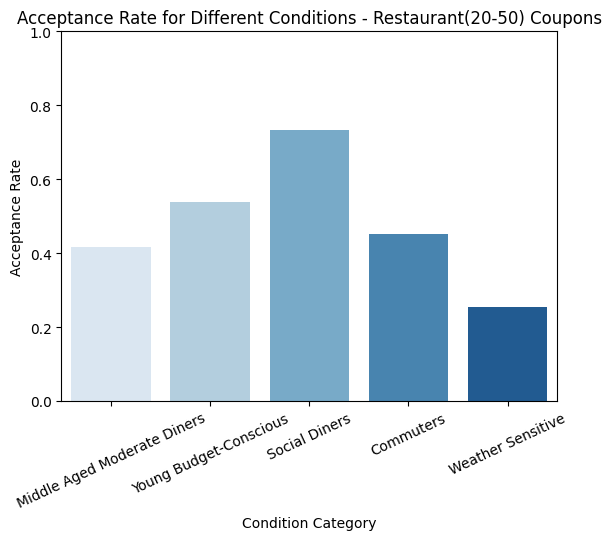

In [93]:
plot_data = pd.DataFrame({
    "Category": [
        "Middle Aged Moderate Diners",
        "Young Budget-Conscious",
        "Social Diners",
        "Commuters",
        "Weather Sensitive",
    ],
    "Acceptance Rate": [
        acceptance_rate_cond_1_r2050,
        acceptance_rate_cond_2_r2050,
        acceptance_rate_cond_3_r2050,
        acceptance_rate_cond_4_r2050,
        acceptance_rate_cond_5_r2050,
    ]
})


sns.barplot(x = "Category", y = "Acceptance Rate", data = plot_data, palette = "Blues")
plt.ylim(0, 1)
plt.ylabel("Acceptance Rate")
plt.xlabel("Condition Category")
plt.title("Acceptance Rate for Different Conditions - Restaurant(20-50) Coupons")
plt.xticks(rotation = 25)
plt.show()

In [44]:
#Young Budget-Conscious Diners lead with a 73.33% acceptance rate, suggesting they are highly motivated by these coupons.
#Middle-Aged Moderate Diners show a moderate response at 53.97%.
#Social Diners have a 45.24% acceptance rate.
#Commuters and Weather-Sensitive conditions both yield a lower acceptance compared to the others.